In [94]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite
from cProfile import label
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
import powerlaw as pl
%matplotlib inline

In [95]:
def plot_degree_dist(G):
    
    degrees = [G.degree(n, weight = 'weight') for n in G.nodes()]
    kmin = min(degrees)
    kmax = max(degrees)
    
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=20)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, num=20)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    print(bin_edges)
    print(density)
    
    fig = plt.figure(figsize=(20,20))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    plt.loglog(x, density, marker='o', linestyle='none')
    plt.xlabel(r"degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)
    
    fit = pl.Fit(degrees, xmin=min(degrees), xmax=max(degrees))
    print('gamma= ',fit.power_law.alpha)
    fit.power_law.plot_pdf(color='black')
    
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')


In [96]:

df = pd.read_csv('../data/fulldata-name.csv', header=0)
df = df[df['Exporter reported quantity'].notnull()]
G = nx.Graph()  # or DiGraph, MultiGraph, MultiDiGraph, etc

taxons = {}
purpose = {}

for index, row in df.iterrows():
    if(row['Taxon'] not in taxons):
        purpose = {}
    
    if(row['Purpose'] == "B"):
        purposeCode = "Breeding"
    if(row['Purpose'] == "E"):
        purposeCode = "Educational"
    if(row['Purpose'] == "G"):
        purposeCode = "Garden"
    if(row['Purpose'] == "H"):
        purposeCode = "Hunting"
    if(row['Purpose'] == "L"):
        purposeCode = "Law"
    if(row['Purpose'] == "M"):
        purposeCode = "Medical"
    if(row['Purpose'] == "R"):
        purposeCode = "Reintroduction to wild"
    if(row['Purpose'] == "P"):
        purposeCode = "Personal"
    if(row['Purpose'] == "Q"):
        purposeCode = "Circus"
    if(row['Purpose'] == "S"):
        purposeCode = "Scientific"
    if(row['Purpose'] == "T"):
        purposeCode = "Commercial"
    if(row['Purpose'] == "Z"):
        purposeCode = "Zoo"
    if(row['Purpose'] == "Unspecified"):
        purposeCode = "Unspecified"
        
    # purposeDetails = {purposeCode: "X"}
        
    # purpose.update(purposeDetails)
    # attributes = {"Purpose": purpose}

    # taxons.update({row['Taxon']: row['Taxon']})
    # G.add_node(row['Exporter'], **attributes)
    
    if G.has_node(row['Exporter']):
        if purposeCode not in G.nodes[row['Exporter']]['purpose']:  
            G.nodes[row['Exporter']]['purpose'].append(purposeCode)
    else:
        purpose = [purposeCode]
        G.add_node(row['Exporter'], purpose = [purposeCode])


df2 = df.drop_duplicates(['Taxon', 'Exporter'])
for i, group in df2.groupby(['Taxon'])['Exporter']: #https://stackoverflow.com/questions/35089255/pandas-reshape-dataframe-to-edge-list-according-to-column-values
    # generate all combinations without replacement 
    # from the group of similar column pairs
    for u, v in itertools.combinations(group, 2):
        if(G.has_edge(u,v)):
            G[u][v]['weight'] += 1
        else:
            G.add_edge(u, v, weight = 1, taxon = [i])
            
nx.write_gml(G, "exporter-exporter-taxon.gml")



Number of nodes:  134
Number of edges:  4071

Weighted average degree: 331.35820895522386
Minimum degree:  0
Maximum degree:  2230

[1.00000000e+00 1.69378449e+00 2.86890589e+00 4.85930828e+00
 8.23062098e+00 1.39408981e+01 2.36128770e+01 3.99951247e+01
 6.77431217e+01 1.14742249e+02 1.94348640e+02 3.29184712e+02
 5.57567958e+02 9.44399958e+02 1.59961000e+03 2.70939460e+03
 4.58913053e+03 7.77299810e+03 1.31657836e+04 2.23000000e+04]
[1.09194681e-02 0.00000000e+00 1.52245749e-02 4.49424794e-03
 2.65337649e-03 7.04941763e-03 3.23705904e-03 4.09529969e-03
 2.41783989e-03 1.90330384e-03 8.98959157e-04 4.97568738e-04
 2.15425129e-04 1.27185678e-04 2.73053260e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
gamma=  8.771722744906583


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
c:\Users\Victor Dong\.conda\envs\CPSC572\lib\site-packages\powerlaw.py:699: RuntimeWarning: divide by zero encountered in divide
  (CDF_diff**2) /
c:\Users\Victor Dong\.conda\envs\CPSC572\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


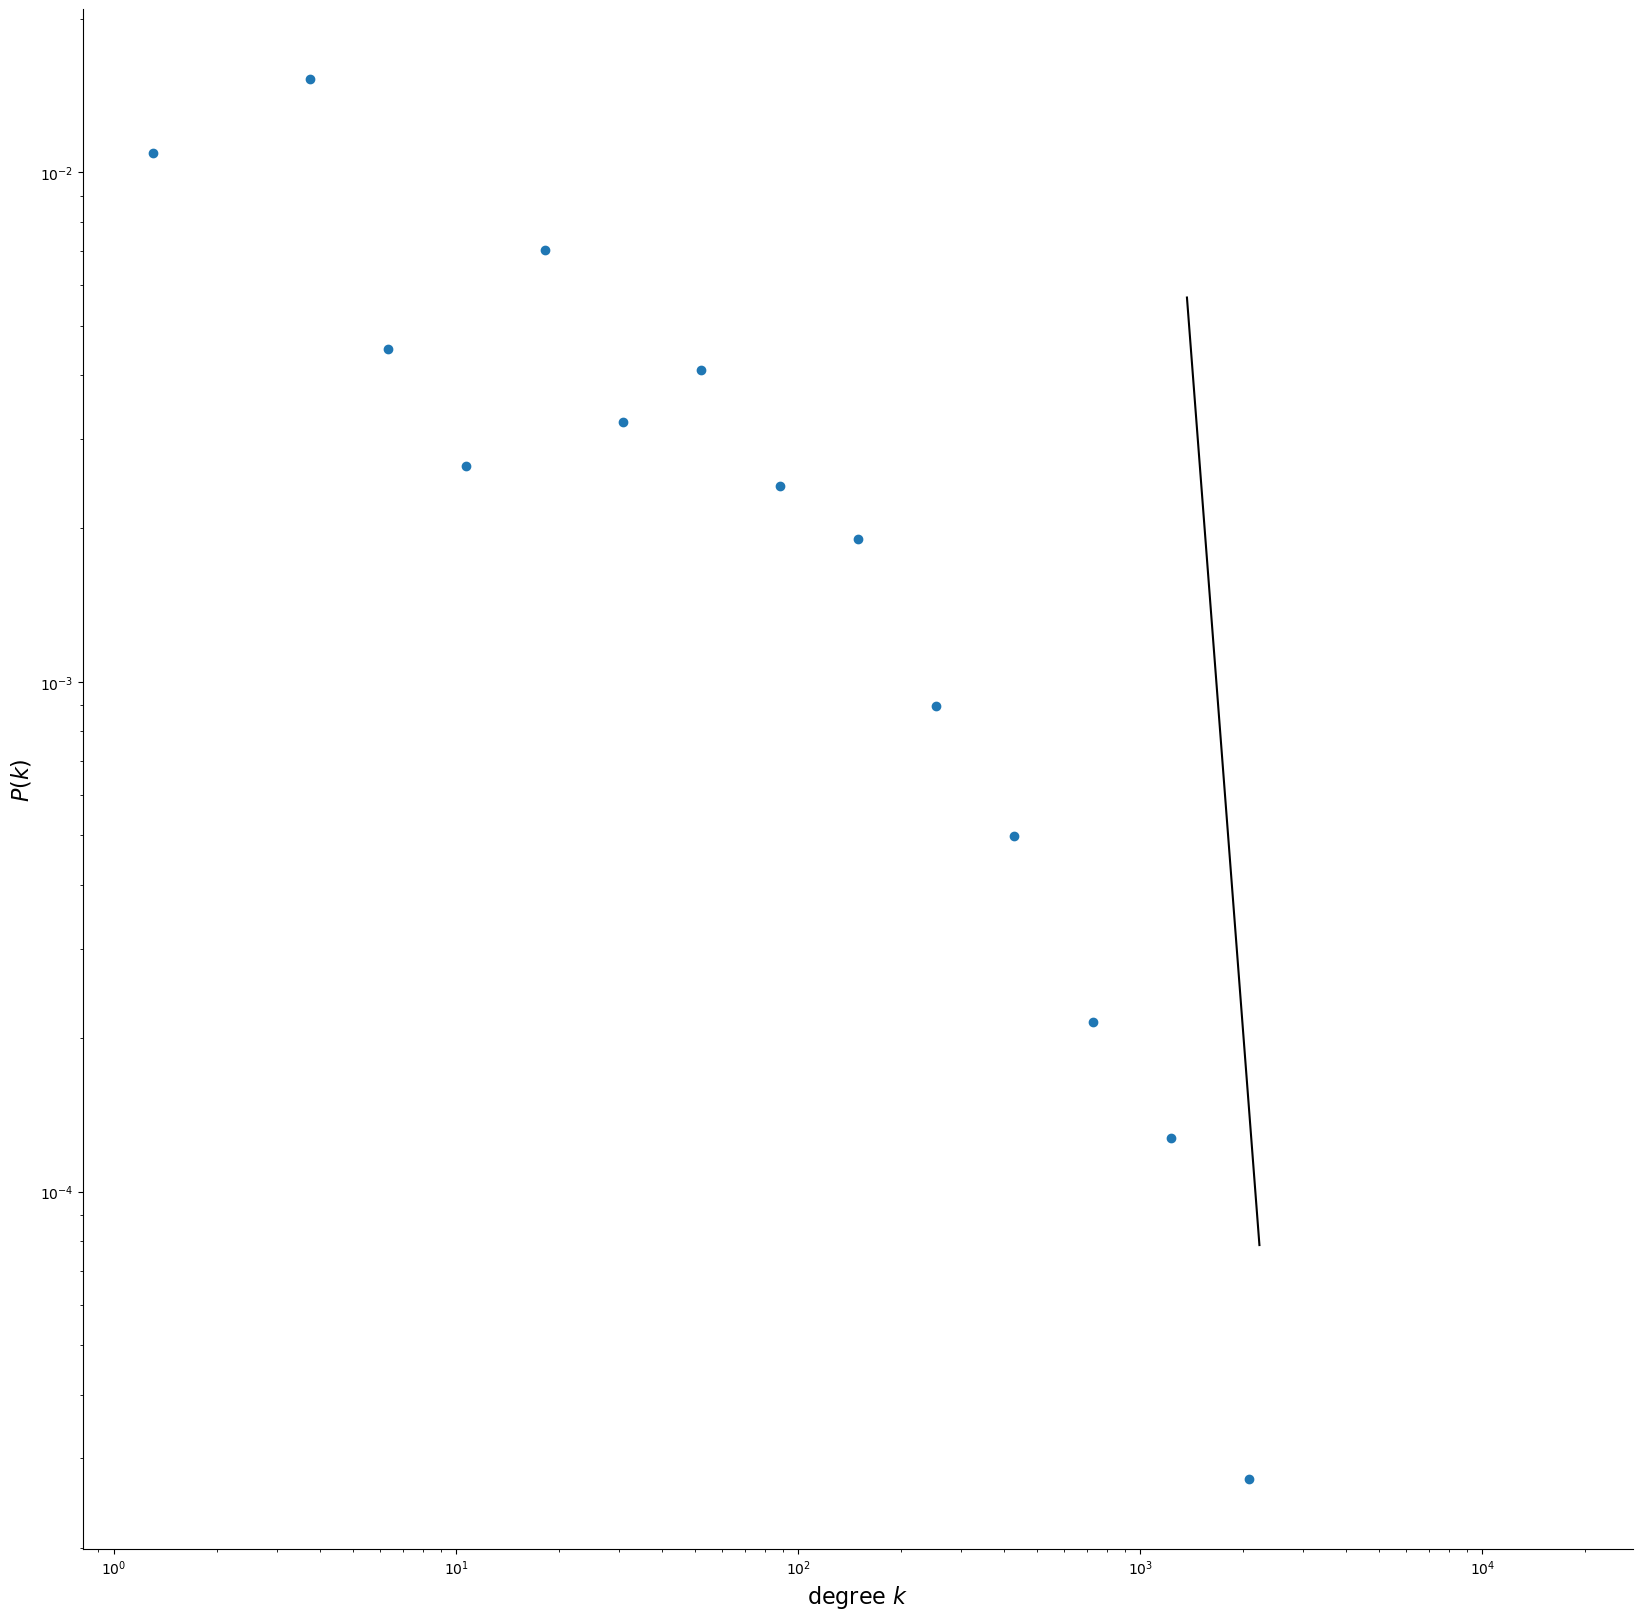

In [97]:
degrees = [G.degree(n, weight = 'weight') for n in G.nodes()]
print("Number of nodes: ", G.number_of_nodes())
print("Number of edges: ", G.number_of_edges())
print()
print("Weighted average degree:", np.mean(degrees))
print("Minimum degree: ", min(degrees))
print("Maximum degree: ", max(degrees))
print()
plot_degree_dist(G)

In [98]:
print("Unweighted average Clustering Coefficient: ", np.mean(list(nx.clustering(G).values())))

print("Weighted average clustering coefficient: ", nx.average_clustering(G, weight='weight'))

print("Number of connected components: ", nx.number_connected_components(G))

for C in (G.subgraph(c).copy() for c in nx.connected_components(G)):
    print("Average shortest path length: ", nx.average_shortest_path_length(C))


Unweighted average Clustering Coefficient:  0.7927670641830104
Weighted average clustering coefficient:  0.02364623738087388
Number of connected components:  3
Average shortest path length:  1.5328475595651168
Average shortest path length:  0
Average shortest path length:  0


[1.00000000e+00 1.68974115e+00 2.85522517e+00 4.82459147e+00
 8.15231076e+00 1.37752950e+01 2.32766829e+01 3.93315690e+01
 6.64601707e+01 1.12300486e+02 1.89758752e+02 3.20643173e+02
 5.41803965e+02 9.15508457e+02 1.54697232e+03 2.61398279e+03
 4.41695429e+03 7.46350944e+03 1.26113991e+04 2.13100000e+04]
[1.09834791e-02 0.00000000e+00 1.53871985e-02 4.55312298e-03
 5.38913663e-03 5.58132178e-03 4.24679551e-03 5.02656339e-03
 4.29686615e-03 1.85828318e-03 7.52456618e-04 3.76799760e-04
 1.21632323e-04 1.31968492e-04 7.09998429e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
gamma=  7.7224644424144335
[1.00000000e+00 1.69378449e+00 2.86890589e+00 4.85930828e+00
 8.23062098e+00 1.39408981e+01 2.36128770e+01 3.99951247e+01
 6.77431217e+01 1.14742249e+02 1.94348640e+02 3.29184712e+02
 5.57567958e+02 9.44399958e+02 1.59961000e+03 2.70939460e+03
 4.58913053e+03 7.77299810e+03 1.31657836e+04 2.23000000e+04]
[1.09194681e-02 0.00000000e+00 1.52245749e-02 4.49424794e-03
 2.653376

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


gamma=  8.771722744906583


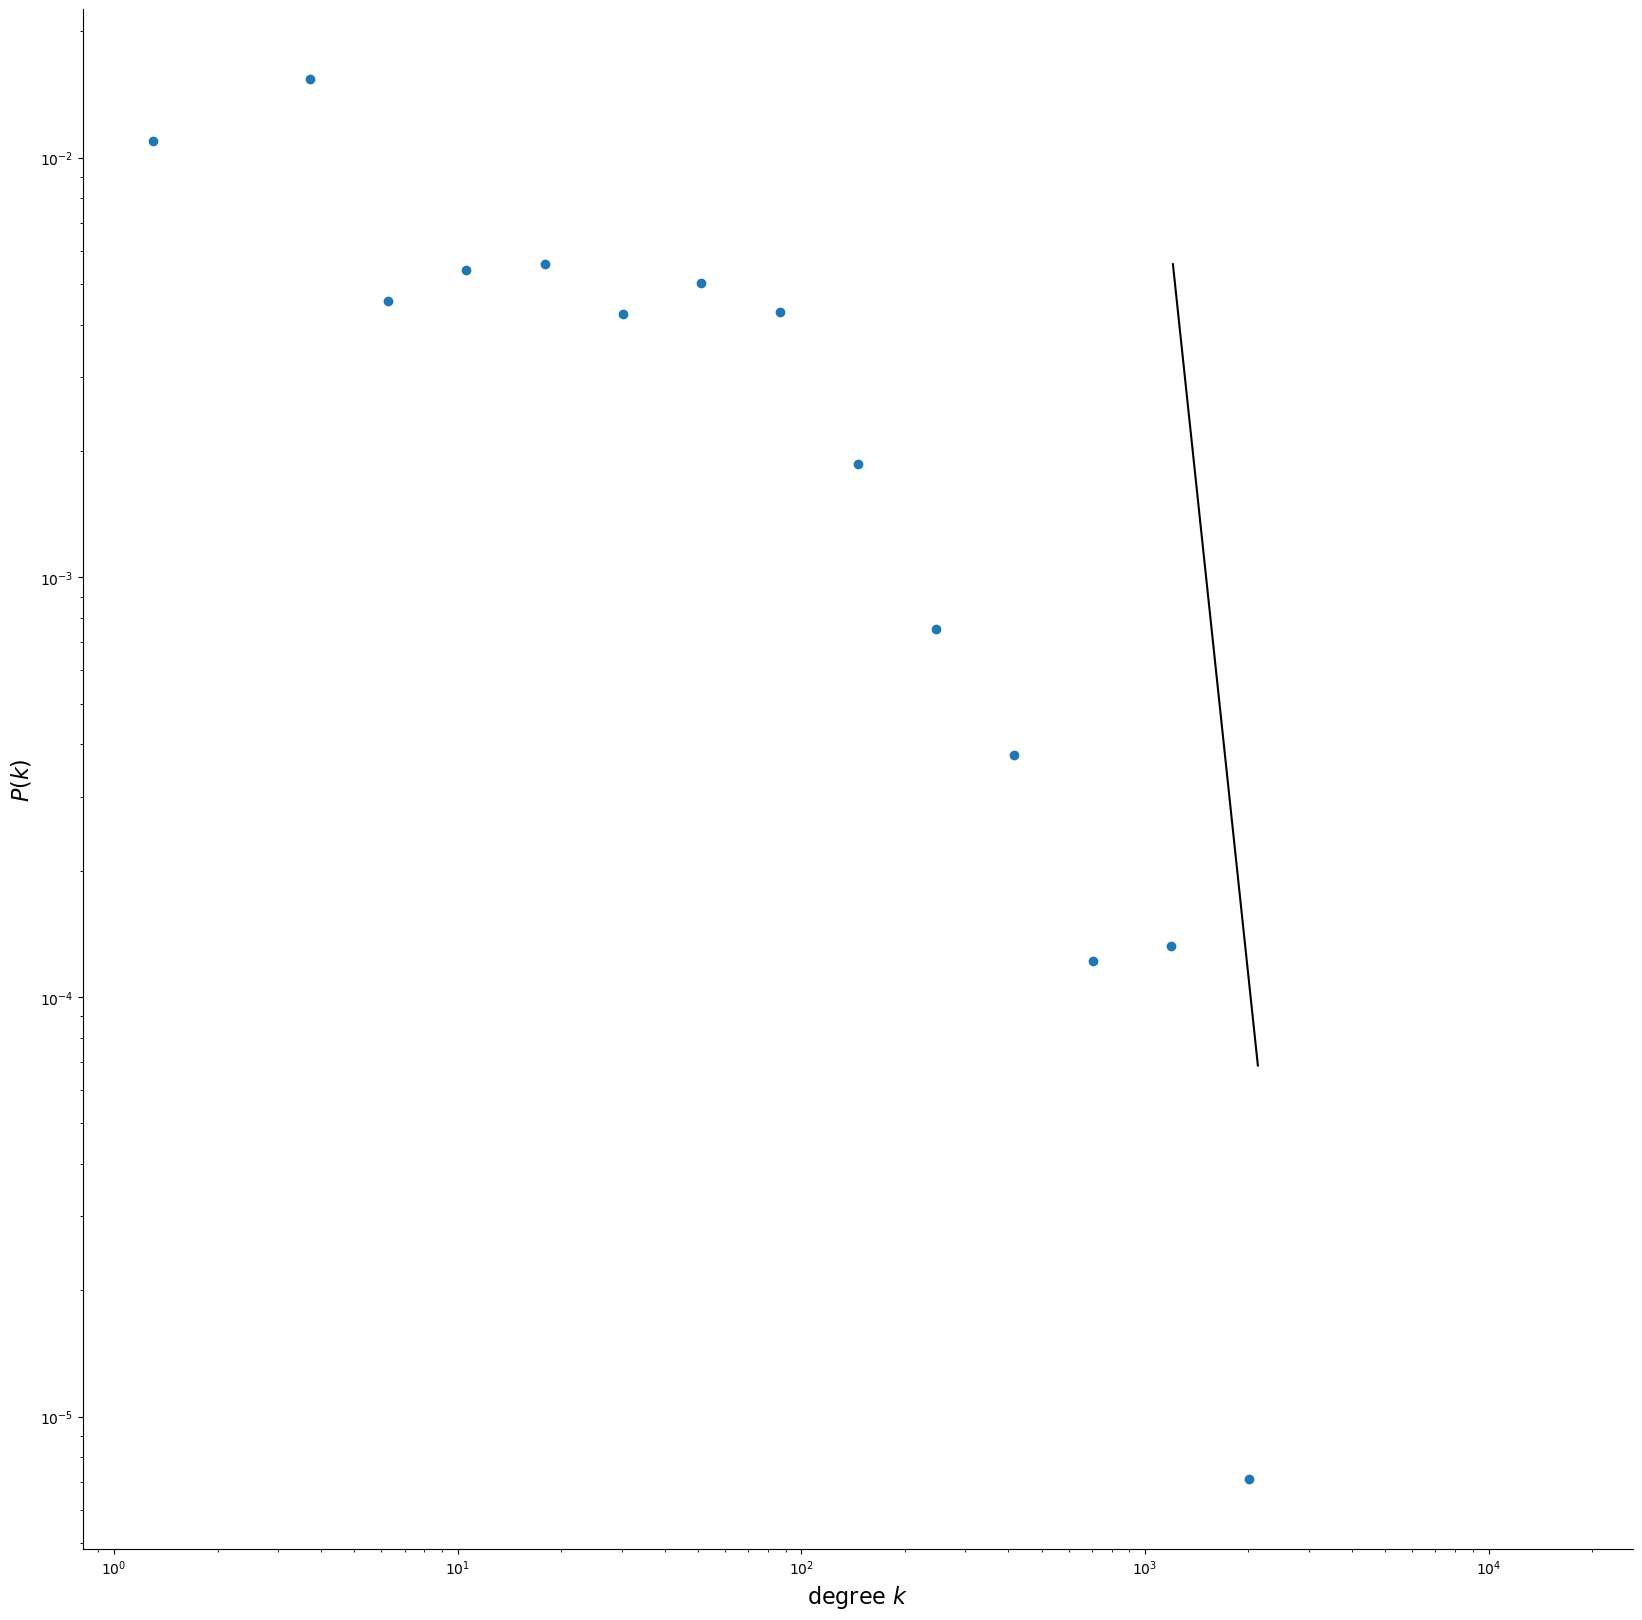

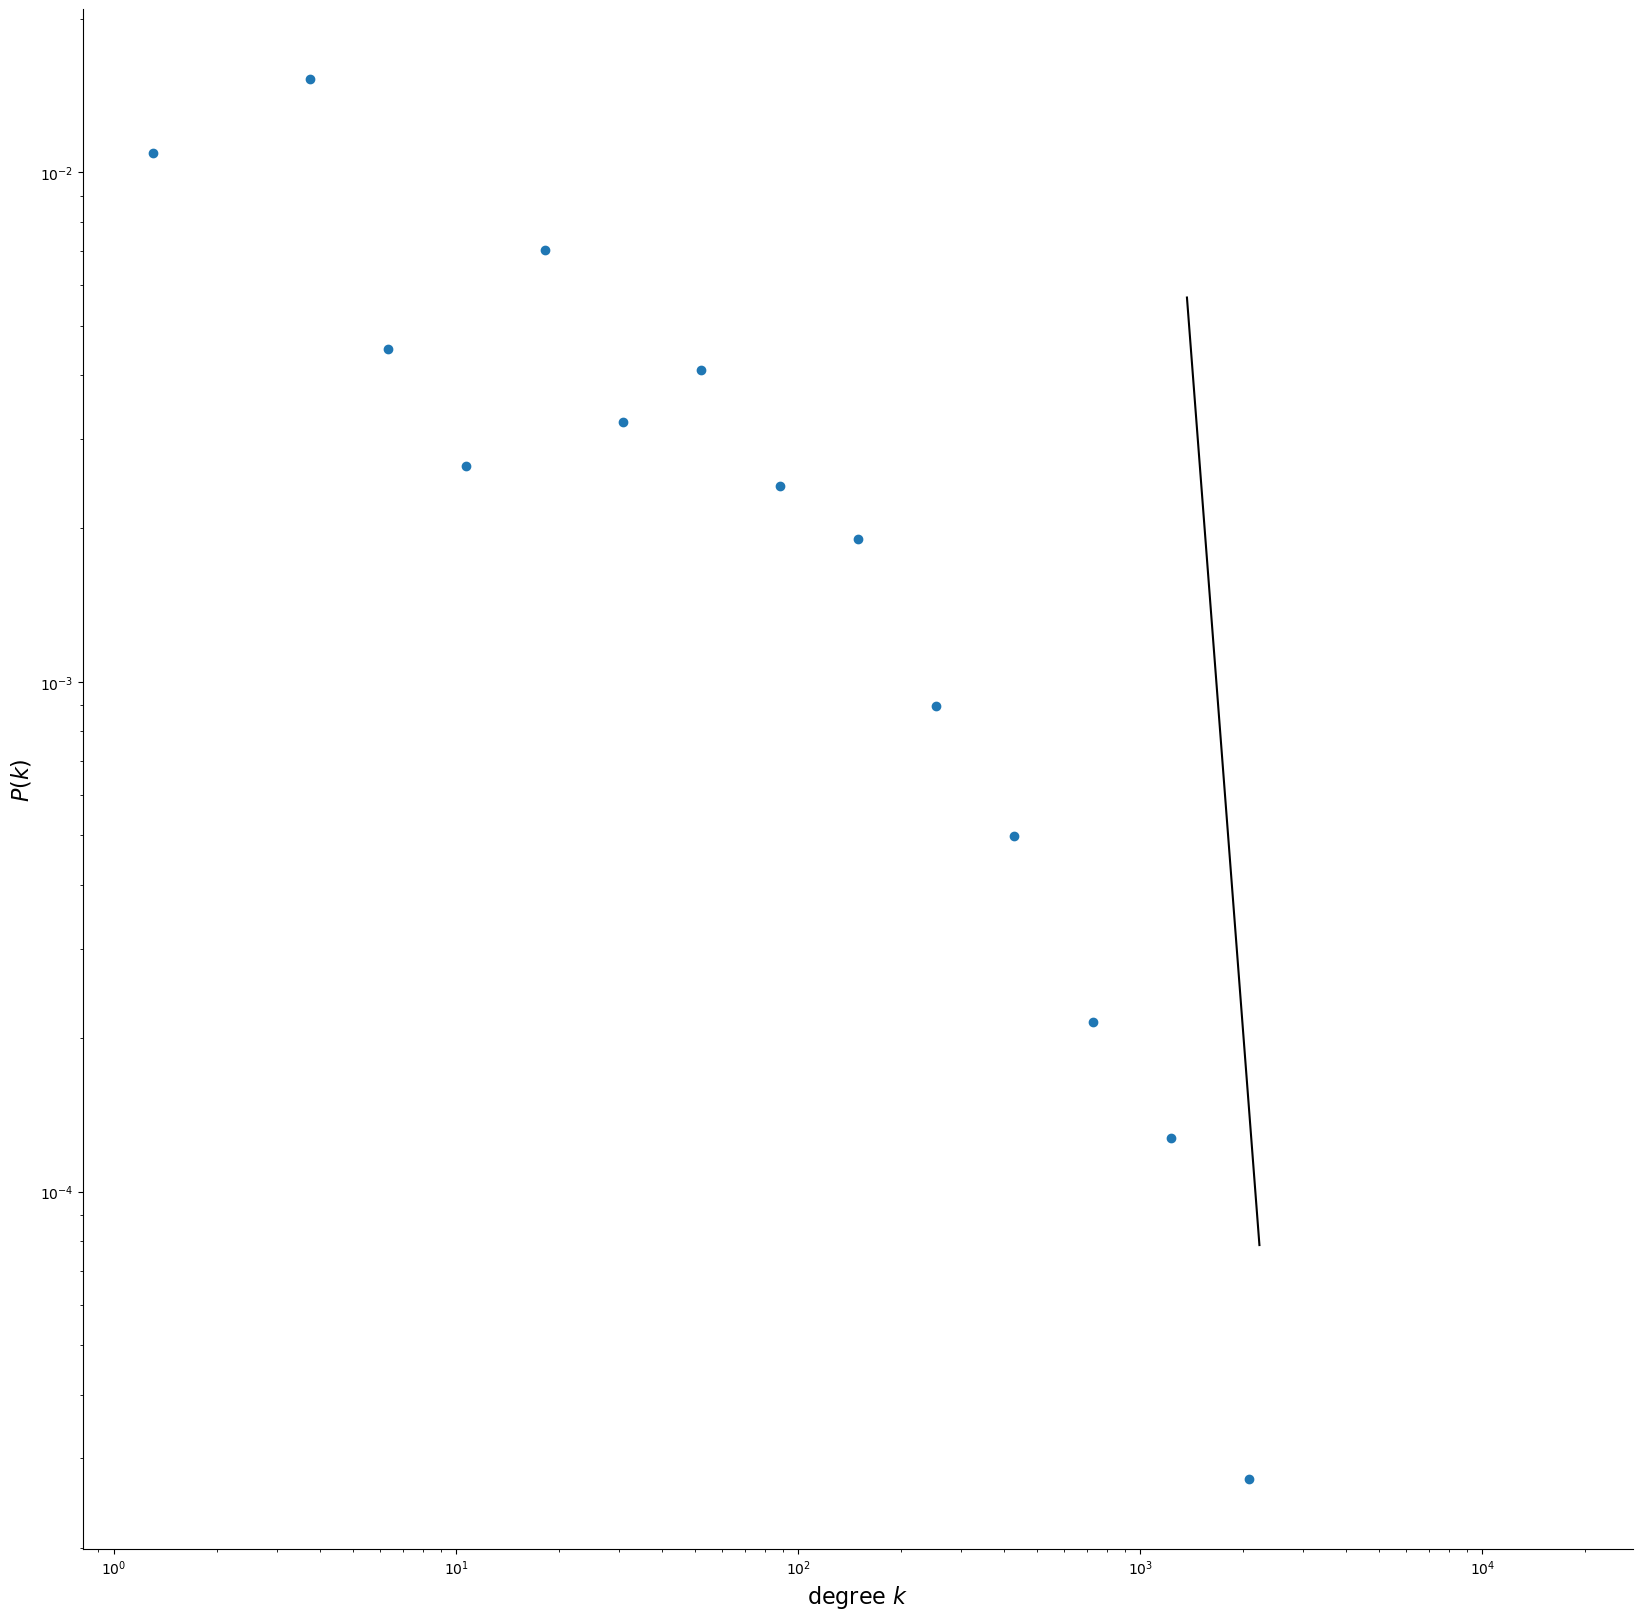

In [99]:
DP = G.copy() # the function edits the graph in place

nx.double_edge_swap(DP,nswap=G.number_of_edges(),max_tries=1000000)
plot_degree_dist(DP)
plot_degree_dist(G)

In [100]:
clustering_DP = []
short_path_DP = []

for i in range(100): # 1000 is better
    
    nx.double_edge_swap(DP,nswap=G.number_of_edges(),max_tries=10000000)
    C_DP = np.mean(list(nx.clustering(DP).values()))
    if nx.is_connected(DP)==True:
        d_DP = nx.average_shortest_path_length(DP,weight=None)
    else:
        for C in (G.subgraph(c).copy() for c in nx.connected_components(DP)):
            if(nx.average_shortest_path_length(C) > 0):
                d_DP = nx.average_shortest_path_length(C)
    clustering_DP.append(C_DP)
    short_path_DP.append(d_DP)
    
print(np.mean(clustering_DP))
print(np.std(clustering_DP))

print(np.mean(short_path_DP))
print(np.std(short_path_DP))

0.759685326354092
0.001559220032312616
1.5328475595651165
2.220446049250313e-16
